<a href="https://colab.research.google.com/github/a-apte/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape) # (8495x9)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
df.dtypes # OKAY

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

In [4]:
df.isnull().sum() # OKAY

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


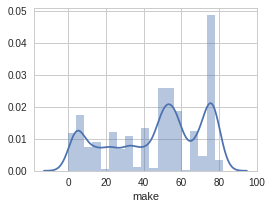

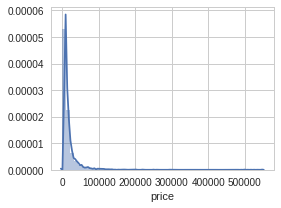

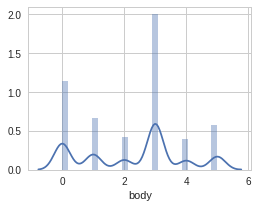

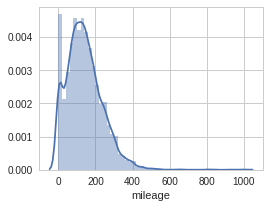

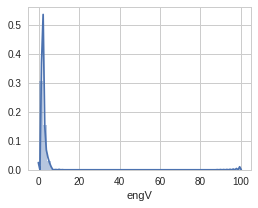

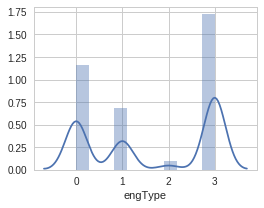

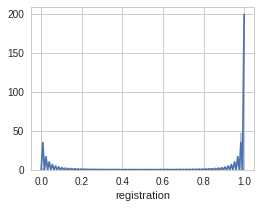

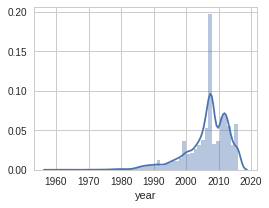

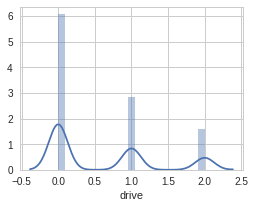

In [5]:
for col in df.columns:  
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  fig.set_size_inches(4, 3)
  sns.distplot(df[col])  
#   numeric_df[col].hist() 
#   ax1.set_xlabel("{}".format(col))
#   ax1.set_title("Histogram for {}".format(col))
  plt.show()

**REMOVING OUTLIERS (observations with data greater than 3 SDs from the mean) PRIOR TO REGRESSION**

In [6]:
print (df.shape)

df = df[(np.abs(st.zscore(df)) < 3).all(axis=1)]

print(df.shape)

(8495, 9)
(7644, 9)


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [7]:
y = df.price
X = df.drop("price", axis=1)

print (y.shape)
print (X.shape)

(7644,)
(7644, 8)


## 1.2 Split the data into test and train datasets using train_test_split

In [8]:
split = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=237)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3822, 8)
(3822, 8)
(3822,)
(3822,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [10]:
print("The Y Intercept is {}".format(model.intercept_))

for c, col in enumerate(X_train.columns):
  print("The coefficient for {} is {}.".format(col, model.coef_[c]))

The Y Intercept is -1697385.1637092764
The coefficient for make is -14.507069153670177.
The coefficient for body is -973.9551464207902.
The coefficient for mileage is -35.760343584669045.
The coefficient for engV is 5660.132328775544.
The coefficient for engType is -1423.9880714536544.
The coefficient for registration is 2.7284841053187847e-12.
The coefficient for year is 850.7843137042671.
The coefficient for drive is 3794.6833102061037.


## 1.5 Use the test data to make predictions

In [0]:
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [12]:
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))
R2 = r2_score(y_test, y_pred)

print('The RMSE is {}'.format(RMSE))
print('The R^2 is {}'.format(R2))

The RMSE is 9060.259222356137
The R^2 is 0.5551718326078927


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

**"year" coefficient interpretation: Increasing the year by 1.0 is expected to increase the price by 850.7843137042671. However, it has yet to be determined if we can reject the null hypothesis that this slope equals 0.**

## 1.8 How should we interpret the Root-Mean-Square Error?

**The Root-Mean-Square Error is a measure of how well our model fits with the true outcome test data. It is an accuracy measure. The lower the number, the much more accurate the model is. It is the square root of the Sum of Squared Errors which Ordinary Least Squares seeks to minimize.**

## 1.9 How should we interpret the $R^2$?

**R-squared is the percentage of the variation in y (outcome) explained by the variation in X (predictors).  It is bounded by 0 to 1. As you add more predictors, the R-squared value increases. It is a "goodness-of-fit" measure.**

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [13]:
log_y = np.log(y)

print (log_y.shape)

(7644,)


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

In [14]:
df_temp = pd.concat((X,log_y), axis=1)

df_temp.rename(columns={'price':'log_price'}, inplace = True)

df_temp.columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'log_price'],
      dtype='object')

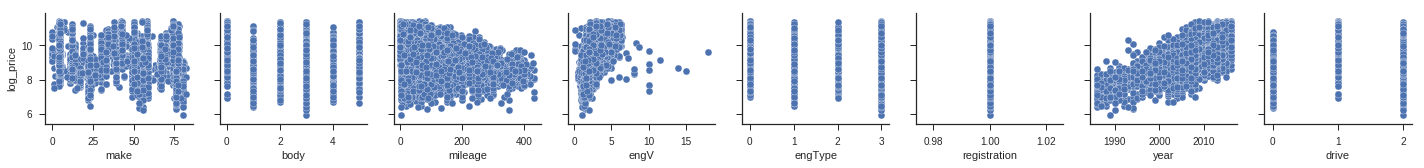

In [15]:
sns.set(style="ticks", color_codes=True)

x_cols = ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']


# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data = df_temp, y_vars= 'log_price', x_vars=x_cols)

**Candidates for polynomial features: make, engV**

## 2.3 If appropriate, create any polynomial features. 

**Residplots**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


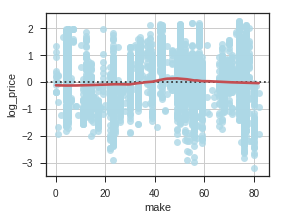

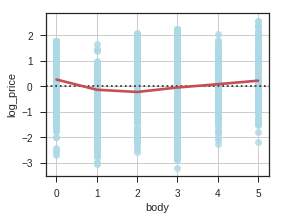

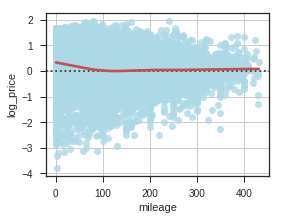

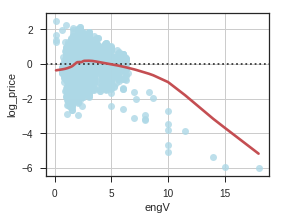

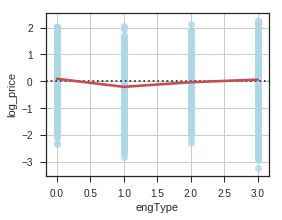

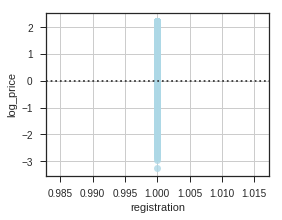

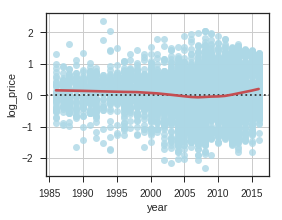

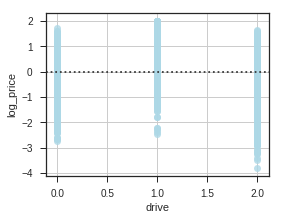

In [16]:
for i, col in enumerate(x_cols):
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  fig.set_size_inches(4, 3)
  plt.grid(True)
  sns.residplot(df_temp[col], df_temp['log_price'], lowess=True, color="r", scatter_kws={'color':'lightblue'})

**Candidates for polynomial features: engV**

In [17]:
df_temp['engV_squared'] = df_temp['engV']**2

df_temp.head()

,make,body,mileage,engV,engType,registration,year,drive,log_price,engV_squared
0,23,0,68,2.5,1,1,2010,1,9.648595,6.25
1,50,3,173,1.8,1,1,2011,2,9.928180,3.24
2,50,2,135,5.5,3,1,2008,2,10.463103,30.25
3,50,5,162,1.8,0,1,2012,0,9.786954,3.24
4,55,0,83,2.0,3,1,2013,1,9.717158,4.00


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [18]:
y2 = df_temp['log_price']
X2 = df_temp.drop('log_price', axis = 1)

# print (y2.shape)
# print (X2.shape)

def RegressionFxn(X,y, split):

# Split into test and train datasets
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=split, random_state=237)

# Fit model using train datasets
  model = LinearRegression()
  model.fit(X_train, Y_train)

# Create new predictions using x_test
  y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)

  print('The RMSE is {}'.format(RMSE))
  print('The R^2 is {}'.format(R2))
  print("The Y Intercept is {}".format(model.intercept_))
  
  for c, col in enumerate(X.columns):
    print("The coefficient for {} is {}.".format(col, model.coef_[c]))
  
  return None


RegressionFxn(X2,y2,0.5)


The RMSE is 0.4153338714109742
The R^2 is 0.7558357263311439
The Y Intercept is -171.57440776323853
The coefficient for make is -0.00047733984010997125.
The coefficient for body is -0.04313527681534922.
The coefficient for mileage is -0.0003163249913499949.
The coefficient for engV is 0.7470807614166568.
The coefficient for engType is -0.04266386009281142.
The coefficient for registration is -8.326672684688674e-16.
The coefficient for year is 0.08950090331016897.
The coefficient for drive is 0.14184933063119626.
The coefficient for engV_squared is -0.05505101588430669.


**This model has a much smaller RMSE and a larger R^2 than the model in #1.**

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

**With a one unit increase in year, log_price is expected to increase by 0.08950090331016897 which implies that price is expected to increase by about 8.95%.**

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

**The Gradient Descent seeks to minimize the Cost Function which in the case of linear regression is the Sum of Squared Errors. One seeks to find the slope coefficients that minimize this cost function either analytically usng partial derivatives or iteratively. **

## 3.2 What is the "Learning Rate" and what is its function?

**In the recursive procedure, the learning rate (alpha) is the speed by which new slope coefficients (thetas) adjust. What one hopes to achieve is convergence to the true slope coefficients that minimize the Cost Function. Too low an alpha value and the recursion is slow to converge, too large an alpha value and the new slope estimates overshoot. **

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [25]:
X2['const'] = 1.0

# X2.head()
# X2.describe()
# y2.head()

# split = 0.5

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=split, random_state=237)


print (sm.OLS(y2, X2).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 4.894e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:43:30   Log-Likelihood:                -3988.4
No. Observations:                7644   AIC:                             7995.
Df Residuals:                    7635   BIC:                             8057.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0007      0.000     -3.064   

**With Robust Standard Errors, the model shows that all slope coefficients are statistically significant. However, the model also warns us of possible multicollinearity problems.**

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

,make,body,mileage,engV,engType,registration,year,drive,engV_squared
make,1.000000,0.042647,-0.013300,-0.131616,-0.032818,NaN,-0.009840,-0.189799,-0.091202
body,0.042647,1.000000,0.292739,-0.216662,-0.184300,NaN,-0.137672,-0.180945,-0.148507
mileage,-0.013300,0.292739,1.000000,0.075896,-0.215324,NaN,-0.578428,0.088040,0.027569
engV,-0.131616,-0.216662,0.075896,1.000000,-0.025412,NaN,-0.003428,0.418374,0.893445
engType,-0.032818,-0.184300,-0.215324,-0.025412,1.000000,NaN,-0.056758,-0.049535,0.020914
registration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.009840,-0.137672,-0.578428,-0.003428,-0.056758,NaN,1.000000,-0.132880,-0.000524
drive,-0.189799,-0.180945,0.088040,0.418374,-0.049535,NaN,-0.132880,1.000000,0.270861
engV_squared,-0.091202,-0.148507,0.027569,0.893445,0.020914,NaN,-0.000524,0.270861,1.000000


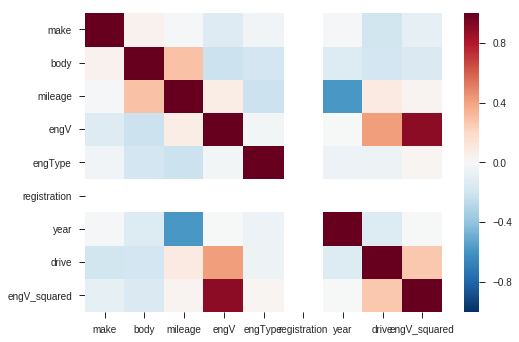

In [26]:
no_const = X2.drop('const', axis=1)
sns.heatmap(no_const.corr())
no_const.corr()

In [27]:


vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]


for i, col in enumerate(X2.columns):
  print ("Column {}   VIF: {}".format(col, vif[i]))

Column make   VIF: 1.0459352142275125
Column body   VIF: 1.2301725813711588
Column mileage   VIF: 1.8056575765880534
Column engV   VIF: 6.349035543810065
Column engType   VIF: 1.1407449732744528
Column registration   VIF: 0.0
Column year   VIF: 1.6364822661513114
Column drive   VIF: 1.3726412747722112
Column engV_squared   VIF: 5.47672189695144
Column const   VIF: 0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


**The Rule of Thumb is that one should reject features with a VIF >= 10. We see that no such variable exists. However, one also sees that engV and engV_squared are highly correlated with one another. We will run the regression again without the polynomial and with robust standard errors to see if the regression improves.**

In [30]:
X3 = X2.drop('engV_squared', axis=1)

print (sm.OLS(y2, X3).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 4.916e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:54:22   Log-Likelihood:                -4549.5
No. Observations:                7644   AIC:                             9115.
Df Residuals:                    7636   BIC:                             9171.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0009      0.000     -3.575   

**The multicollinearity problem improves slightly but we see that 'mileage' is no longer a statistically significant variable. One will omit this variable in the next robust standard error regression to see if it improves.**

In [32]:
X4 = X3.drop('mileage', axis=1)

print (sm.OLS(y2, X4).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 5.278e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:58:22   Log-Likelihood:                -4549.6
No. Observations:                7644   AIC:                             9113.
Df Residuals:                    7637   BIC:                             9162.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0009      0.000     -3.567   

**With all of the slope coefficients statistically significant and all of the highly correlated variables removed, this is the natural stopping point.**